## Data Loading and preprocessing

In [4]:
import pandas as pd

In [5]:
file="C:\\Users\\tejag\\Downloads\\un-general-debates-blueprint (1).csv"

In [6]:
df=pd.read_csv(file)
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## Importing nltk Package

In [7]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'doing', "doesn't", 'i', 'own', 'at', 'down', 'didn', 'in', 'on', 'its', 'out', 'haven', 'nor', "isn't", 'up', "that'll", 'each', "hadn't", 'very', 'myself', 'itself', 'of', 'him', 'we', 'yourself', 'there', 'only', "weren't", 'those', 's', 'same', 'ourselves', 'these', 'few', 'because', 'they', 'her', 'does', 'you', 'can', "should've", 'here', 'again', 'doesn', 'had', 'has', "won't", 'all', 'below', 'me', 'aren', 'yours', 'd', 'his', 'she', 'other', 'should', 'ain', 'be', 'it', 've', 're', 'shan', 'll', 'further', "hasn't", 'ma', 'after', 'hers', 'such', 'more', 'do', "didn't", 'about', "she's", 'don', 'before', 'from', 'so', 'did', 'm', 'y', 'what', 'who', 'herself', "couldn't", 'no', 'won', 'hadn', 'most', "haven't", 'or', 'against', 'now', 'needn', 'o', 'under', 'too', 'both', 'just', "it's", "shan't", 'which', "aren't", 'was', 'the', 'your', 'for', 'have', 'than', "wasn't", 'he', 'been', 'while', 'if', 'hasn', "needn't", 'them', 'off', 'whom', "mightn't", 'an', "mustn't", 'are', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pre Processing Pipeline

In [8]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text 
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

## Token Frequency Analysis and Visualization

## Counting The Tokens

In [9]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


## Wordclouds

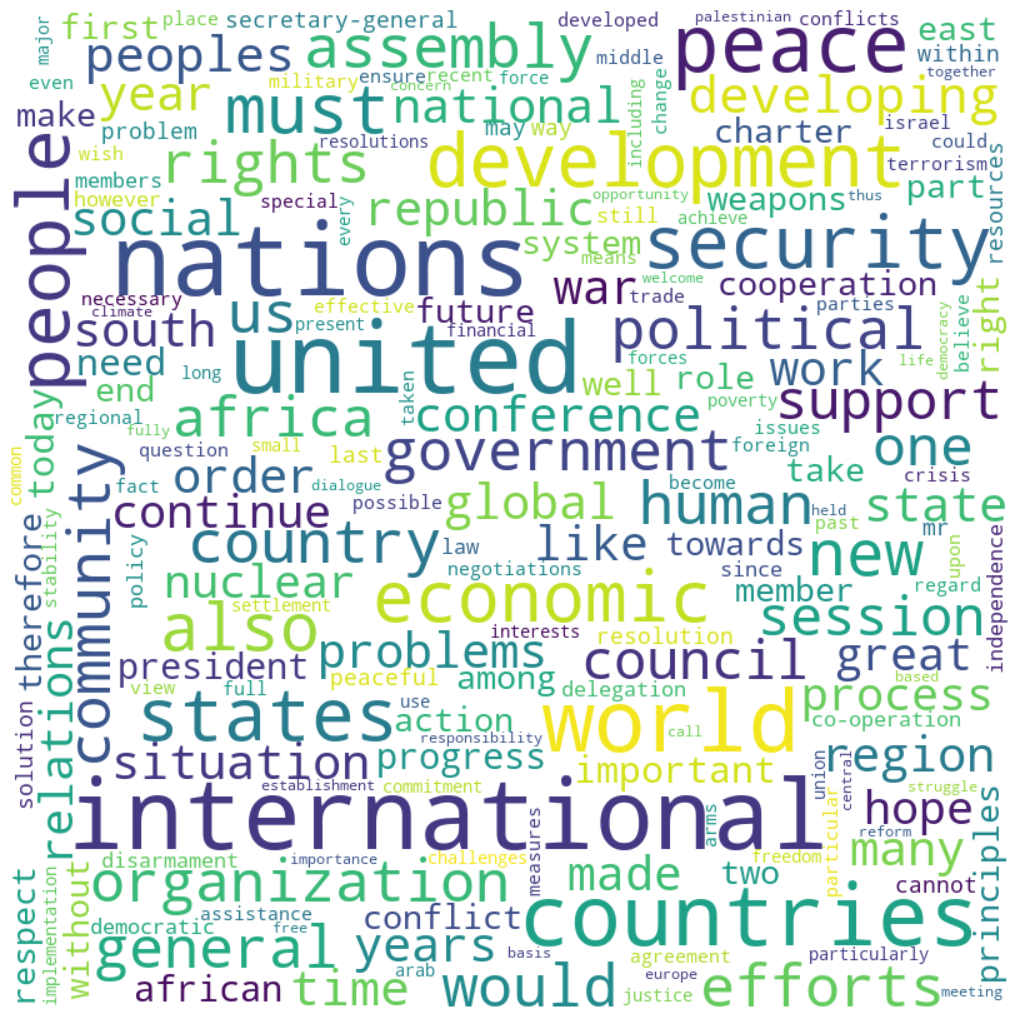

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with desired parameters
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)

# Generate word cloud from the frequency dictionary
wc.generate_from_frequencies(freq_df['freq'])

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')  # Improving interpolation for smoother image
plt.axis("off")
plt.tight_layout(pad=0)

# Saving the word cloud as an image (optional)
# plt.savefig('wordcloud.png', dpi=300)

plt.show()

In [11]:
import numpy as np
import pandas as pd
from collections import Counter

def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    counter = Counter()

    def update(doc):
        nonlocal counter
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    df[column].map(update)

    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1
    idf_df.index.name = 'token'

    return idf_df

idf_df = compute_idf(df) 

In [12]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


## Wordcloud

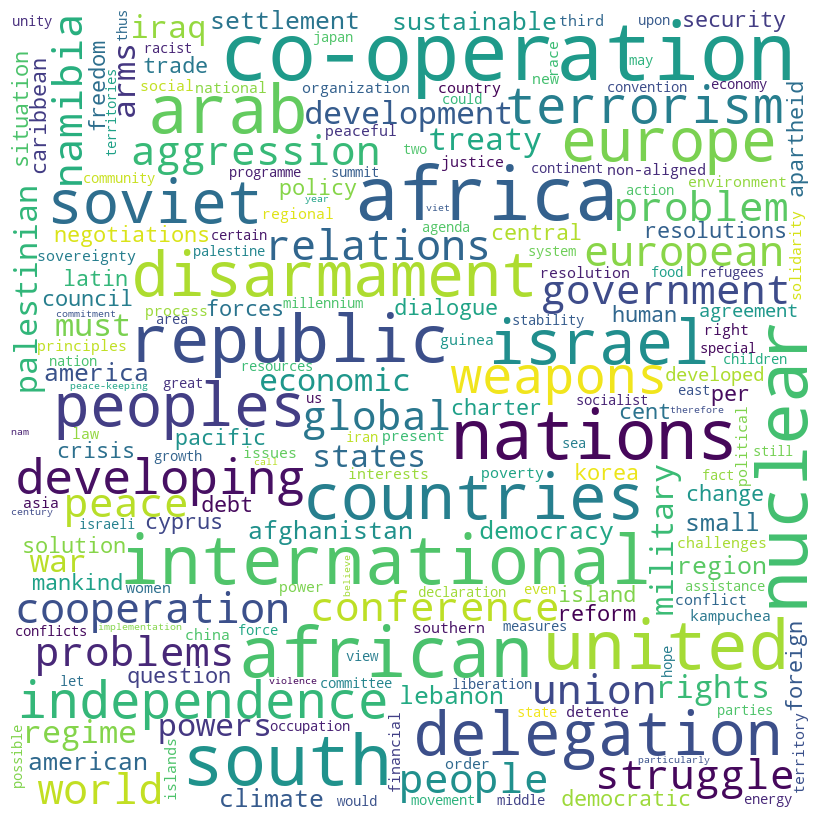

In [13]:
wc = WordCloud(background_color='white', width=800, height=800, margin=2, max_font_size=80, min_font_size=10)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Keyword Analysis by Year 

In [14]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [15]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)